In [55]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt 
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import warnings
warnings.filterwarnings("ignore")



data=pd.read_excel(r'France-Emissions.xlsx',
                   #index_col=0,
                   #parse_dates=True,
                   #squeeze=True,
                   engine='openpyxl')
data.head()

,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,1802,2.239,NaN,NaN,NaN,NaN,NaN,0.076,NaN,6.086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29539312,NaN
1,1804,2.176,-2.782,-0.062,NaN,NaN,NaN,0.073,NaN,6.343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29724666,NaN
2,1810,2.121,-2.525,-0.055,NaN,NaN,NaN,0.070,NaN,5.675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30293172,NaN
3,1811,2.052,-3.282,-0.070,NaN,NaN,NaN,0.068,NaN,5.184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30393404,NaN
4,1812,2.217,8.036,0.165,NaN,NaN,NaN,0.073,NaN,5.406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30499974,NaN


In [56]:
data['co2_log']=np.log(data['co2'])
data['co2_log']

0      0.806029
1      0.777488
2      0.751888
3      0.718815
4      0.796155
         ...   
206    5.815369
207    5.832193
208    5.837602
209    5.847978
210    5.822788
Name: co2_log, Length: 211, dtype: float64

In [57]:
data['co2 first difference']=data['co2_log'].diff(1)
data['co2 first difference']

0           NaN
1     -0.028541
2     -0.025601
3     -0.033073
4      0.077340
         ...   
206   -0.089590
207    0.016825
208    0.005409
209    0.010376
210   -0.025190
Name: co2 first difference, Length: 211, dtype: float64

In [58]:
def adfuller_test(co2):
    result=adfuller(co2)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [59]:
adfuller_test(data['co2 first difference'].dropna())

ADF Test Statistic : -7.31342648500802
p-value : 1.2470635894269063e-10
#Lags Used : 2
Number of Observations Used : 207
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

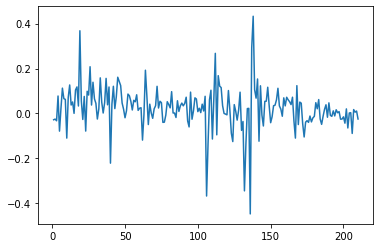

In [60]:
data['co2 first difference'].plot()

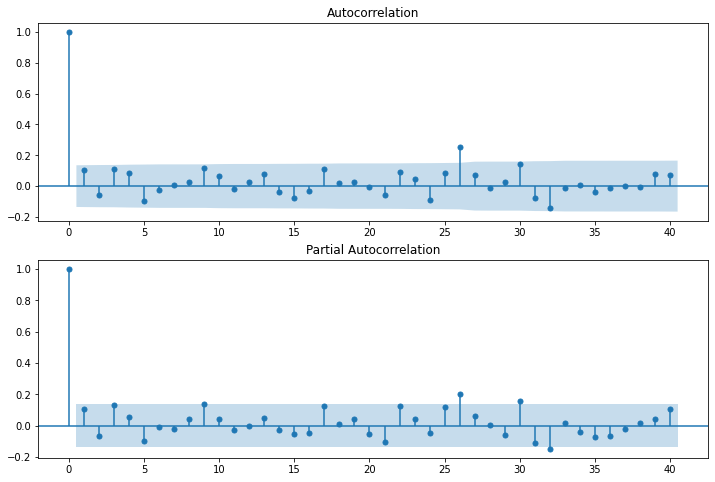

In [61]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['co2 first difference'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['co2 first difference'].iloc[1:],lags=40,ax=ax2)

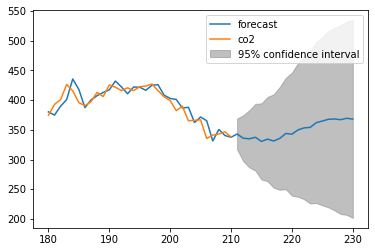

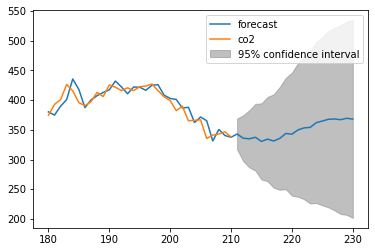

In [90]:
from statsmodels.tsa.arima_model import ARIMA
#model=ARIMA(data['co2'],order=(9,1,9)).fit(transparams=False)



#data['forecast']=model.predict(start=181,end=211,dynamic=True,typ='levels')
#data[['co2','forecast']].plot(figsize=(12,8))

model = ARIMA(data.co2, order=(9, 1, 9))
result = model.fit(disp=0)

result.plot_predict(
    start=180,
    end=230,
    dynamic=False,
)

#plot_predict()